In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

data3 = pd.read_csv("data/features_3_sec.csv")
data2 = pd.read_csv("data/features_3_sec.csv")

genre_map = {"blues": 0, "classical": 1, "country": 2, "disco": 3, "hiphop": 4, "jazz": 5,
             "metal": 6, "pop": 7, "reggae": 8, "rock": 9}
data3['label'] = data3['label'].map(genre_map)
data3.head()

y3 = data3['label'].values
X3 = data3.iloc[:, 1:-1].values

from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler(with_mean=0, with_std=1)

minmax = MinMaxScaler()
model=minmax.fit(X3)
minmax=model.transform(X3)

X3_train, X3_test, y3_train, y3_test = \
    train_test_split(X3, y3, test_size = 0.3, random_state = 0, stratify = y3)

sX3_train = scaler.fit_transform(X3_train)
sX3_test = scaler.fit_transform(X3_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

t1 = time.time()

kn = KNeighborsClassifier()

params = {
    "n_neighbors": range(1, 11),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2]
    
}

gs3 = GridSearchCV(estimator=kn,
                  param_grid=params,
                  scoring='accuracy',
                  cv=5)

##k fold cross validation

gs3.fit(sX3_train, y3_train)

print(str(time.time() - t1))
print('Best Accuracy: %.2f%%' % (gs3.best_score_*100))
print('Best Params: %s' % gs3.best_params_)
print(f"Test Accuracy: {gs3.score(sX3_test, y3_test)*100:0.3f}%")

376.91430377960205
Best Accuracy: 91.46%
Best Params: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Test Accuracy: 92.659%


In [143]:
train_acc = []
test_acc = []
for i in range(1, 10):
    t1 = time.time()
    kn = KNeighborsClassifier(n_neighbors=i, weights="distance", p=1)
    kn.fit(sX3_train, y3_train)
    print(kn.score(sX3_train, y3_train)*100)
    print(kn.score(sX3_test, y3_test)*100)
    train_acc.append(kn.score(sX3_train, y3_train)*100)
    test_acc.append(kn.score(sX3_test, y3_test)*100)
    print(str(time.time()-t1))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [142]:
train_acc

[]

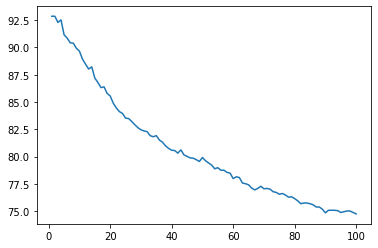

In [136]:
plt.plot(range(1, 101), train_acc, label = "Training Data")
plt.plot(range(1, 101), test_acc, label = "Testing Data")

plt.show()

In [131]:
kn3 = KNeighborsClassifier(n_neighbors=2, weights="distance", p=1)

kn3.fit(sX3_train, y3_train)

y3_pred = kn3.predict(sX3_test)
y3_pred

array([1, 7, 2, ..., 4, 7, 2], dtype=int64)

In [97]:
def labeler(labels, genre_map):
    new_acc = {}
    for genre in genre_map.keys():
        for num in labels.keys():
            if genre_map[genre] == num:
                new_acc[genre] = acc[num]
                break
                
    new_acc = dict(sorted(new_acc.items(),key= lambda x:x[1]))
    return new_acc

In [77]:
from collections import Counter
genre_accuracy = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
errors = []
i = 0 
for i in range(len(y3_pred)):
    if y3_test[i] != y3_pred[i]:
        error = []
        error.append(y3_pred[i])
        error.append(y3_test[i])
        errors.append(error)
hundred = Counter(y3_test)
errors

for e in errors:
    hundred[e[1]] -= 1
hundred

acc = {}
for g in range(len(list(set(data3["label"].values)))):
    acc[list(set(data3["label"].values))[g]] = round(hundred[g] / 30, 4) * 10
acc=dict(sorted(acc.items(),key= lambda x:x[1]))
acc

{2: 86.333,
 9: 87.333,
 5: 89.667,
 7: 91.333,
 4: 93.333,
 3: 94.0,
 0: 94.333,
 6: 95.667,
 8: 96.667,
 1: 97.0}

Text(0, 0.5, 'Accuracy')

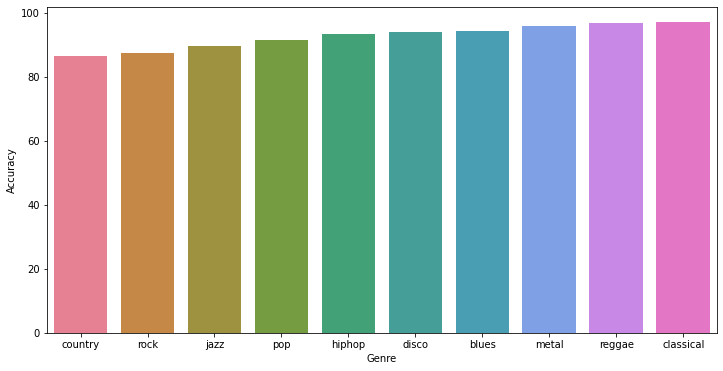

In [129]:
import seaborn as sns

new_acc = labeler(acc, genre_map)

genres = list(new_acc.keys())
values = list(new_acc.values())

f, ax = plt.subplots(figsize=(12, 6));
sns.barplot(x=genres, y=values, palette = 'husl')

plt.xlabel("Genre")
plt.ylabel("Accuracy")


In [108]:
fp = []
for e in errors:
    fp.append(e[0])
Counter(fp)
#for i in range(len(Counter(y3_test))):





Counter({6: 11, 2: 24, 3: 37, 0: 14, 9: 31, 5: 24, 8: 36, 1: 23, 7: 7, 4: 13})

In [125]:
genre_test = []
genre_pred = []
regenre_map = {0:"blues", 1:"classical", 2:"country", 3:"disco", 4:"hiphop", 5:"jazz", 6:"metal", 7:"pop", 8:"reggae", 9:"rock"}
for i in range(len(y3_pred)):
    genre_test.append(regenre_map[y3_test[i]])
    genre_pred.append(regenre_map[y3_pred[i]])
sorted(list(set(data2['label'].values)))

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

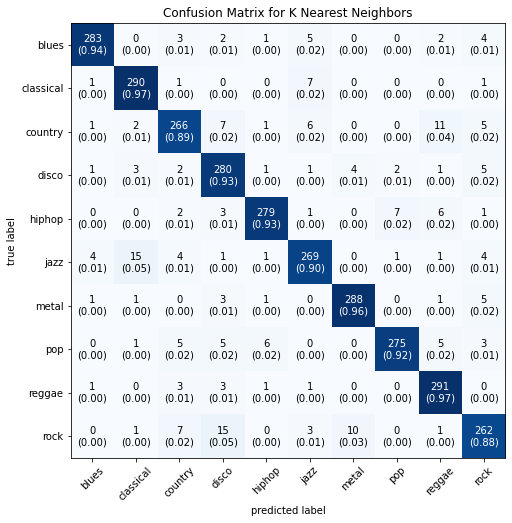

In [132]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confmat = confusion_matrix(y3_test, y3_pred)

fig, ax = plot_confusion_matrix(conf_mat=confmat, show_absolute=True, show_normed=True, figsize=(8,8),  class_names=sorted(list(set(data2['label'].values))))
plt.title("Confusion Matrix for K Nearest Neighbors")
plt.show()